In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the data to fit the model
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 17s 1us/step


c:\Users\Dipanshu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.8600 - loss: 0.4526 - val_accuracy: 0.9845 - val_loss: 0.0536
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.9821 - loss: 0.0575 - val_accuracy: 0.9897 - val_loss: 0.0440
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.9867 - loss: 0.0417 - val_accuracy: 0.9877 - val_loss: 0.0408
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9899 - loss: 0.0292 - val_accuracy: 0.9903 - val_loss: 0.0334
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9935 - loss: 0.0209 - val_accuracy: 0.9905 - val_loss: 0.0390
313/313 - 2s - 7ms/step - accuracy: 0.9874 - loss: 0.0385

Test accuracy: 0.9873999953269958


In [6]:
import numpy as np
import matplotlib.pyplot as plt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class: 7
Actual class: 7


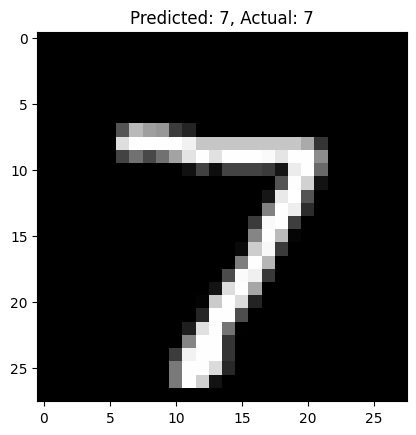

In [8]:
def predict_single_image(model, image):
    # Check if the image is already normalized; if not, normalize it
    if np.max(image) > 1.0:
        image = image / 255.0
    
    # Reshape the image to match the input shape of the model
    image = image.reshape((1, 28, 28, 1))
    
    # Predict the class of the image
    prediction = model.predict(image)
    
    # Get the class with the highest probability
    predicted_class = np.argmax(prediction)
    
    return predicted_class

# Test the function with an image from the test set
index = 0  # Change the index to test different images
test_image = x_test[index].reshape(28, 28)
predicted_class = predict_single_image(model, test_image)

print(f'Predicted class: {predicted_class}')
print(f'Actual class: {y_test[index]}')

# Plot the test image
plt.imshow(test_image, cmap='gray')
plt.title(f'Predicted: {predicted_class}, Actual: {y_test[index]}')
plt.show()